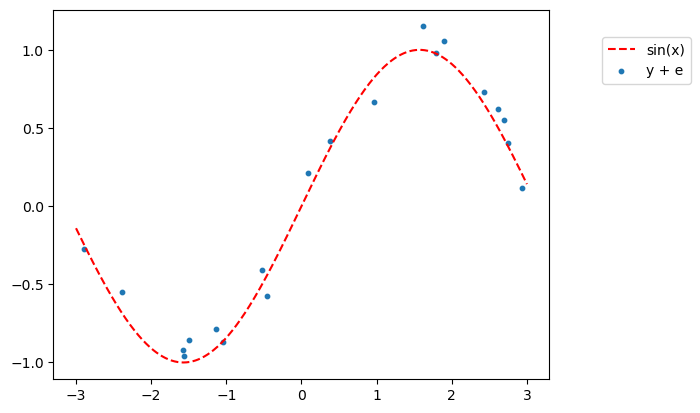

PyObject <matplotlib.legend.Legend object at 0x7f14c3376af0>

In [2]:
using PyPlot
using Revise
using Distributions

n = 20       # pocet bodu
s = 0.08     # rozptyl chyby

a = -3.0     # rozsah x
b = 3.0

x = rand(a:0.01:b, n)
y = sin.(x)

e = rand(Normal(0, s), n)     #  e ~ N(0, s)
signal = y+e 

fig = figure()
d = collect(a:0.01:b)
plot(d, sin.(d), "r--", label ="sin(x)")
scatter(x,signal, s=10, label = "y + e")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)


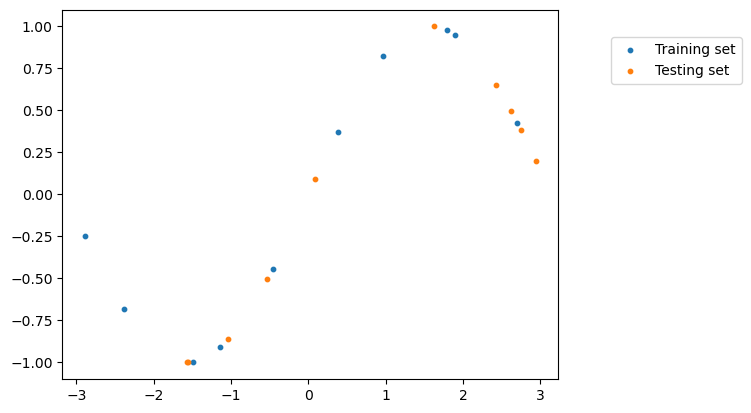

PyObject <matplotlib.legend.Legend object at 0x7f14f06d0880>

In [3]:
# rozdeleni na trenovaci data (fituji se) a testovaci data

ind = collect(1:n)

ind_train = sample(1:n, Int(n/2), replace = false)
ind_test = setdiff(ind, ind_train)
x_train = x[ind_train]
x_test = x[ind_test]
y_train = y[ind_train]
y_test = y[ind_test]


fig = figure()
scatter(x_train,y_train, s=10, label = "Training set")
scatter(x_test,y_test, s=10, label = "Testing set")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)

In [33]:
function P( w, x, d)
    res = zeros(size(x))

    for i=1:size(x)[1]
        for j=1:d
            res[i] = res[i] + w[j]*x[i]^(j-1)
        end
    end
    return res
end


function grad(x,y,w,d)
    g = zeros(d)
    
    dif = (P(w,x,d) .- y)
    
    for j=1:d
        for i =1:size(x)[1]
            g[j] = g[j] + dif[i]*x[i]^(j-1)
        end
    end
    
    return g, sqrt(sum(dif.*dif))
end

function grad_descend(x, y, w0, d, step, resid, iter_max, vypis)
    i = 0
    g_norm = 1.0    
    while (i<iter_max && g_norm > resid)
        
        i=i+1
        g, loss = grad(x,y,w0,d)
        w1 = w0 - step.*g
        
        w0 = w1
        g_norm = sqrt(sum(g.*g))
        
        if mod(i, vypis)==0
            println("iter = ", i)
            println("  w = ", w0)
            println("  loss = ", loss)
            println("g norm = ", g_norm)
            println()
        end
    end 
    
    return w0
end



function grad_descend_regul(x, y, w0, d, step, resid, iter_max, vypis, l)
    i = 0
    g_norm = 1.0    
    while (i< iter_max && g_norm > resid)
        
        i=i+1
        g, loss = grad(x,y,w0,d)
        w1 = w0 - step.*(g .+ l.*w0)    # zahrnuta derivace regul. clenu
        
        w0 = w1
        g_norm = sqrt(sum(g.*g))
        
        if mod(i, vypis)==0
            println("iter = ", i)
            println("  w = ", w0)
            println("  loss = ", loss)
            println("g norm = ", g_norm)
            println()
        end
    end 
    
    return w0
end



function plot_results(x_train, y_train, x_test, y_test, w_init, w_final, fig_title)
    fig = figure()
    scatter(x_train, y_train, s=10, label = "Training values")

    plot(collect(a:0.01:b), P(w_init, collect(a:0.01:b) , d), "--", label = "Initial estimation")
    plot(collect(a:0.01:b), P(w_final, collect(a:0.01:b) , d), "k-", label = "Final estimation")
    title(fig_title)

    legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)



    fig = figure()
    scatter(x_train, y_train, s=10, label = "Training values")
    scatter(x_test, y_test, s=10, label = "Testing values")
    plot(collect(a:0.01:b), P(w_final, collect(a:0.01:b) , d), "k-", label = "Final estimation")

    legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)
end



plot_results (generic function with 2 methods)

iter = 500000
  w = [-0.0067898695977219314, 0.9464489207005902, 0.003716582799146714, -0.13796125066264273, -0.00046183889875327054, 0.004115038315521874]
  loss = 0.055320359383341844
g norm = 0.05934408675124917

iter = 1000000
  w = [0.0012956636938457025, 0.9894054325559317, -0.001950081560958159, -0.15683252278980842, 0.00028467886532742274, 0.005856601496912415]
  loss = 0.007799539930984358
g norm = 0.0031929137877147558

w final = 

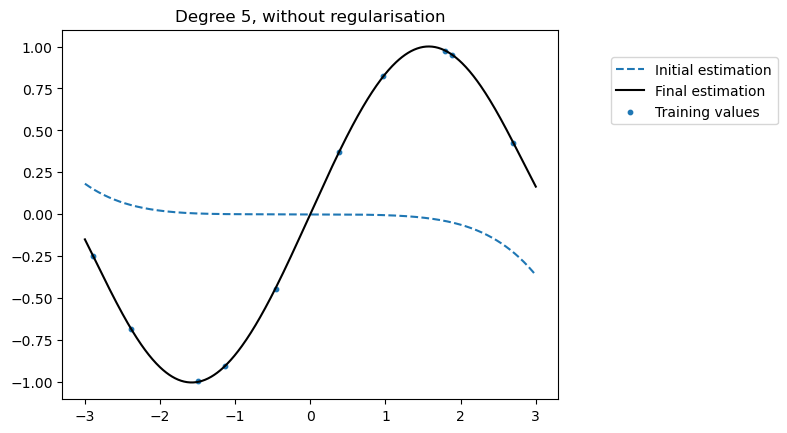

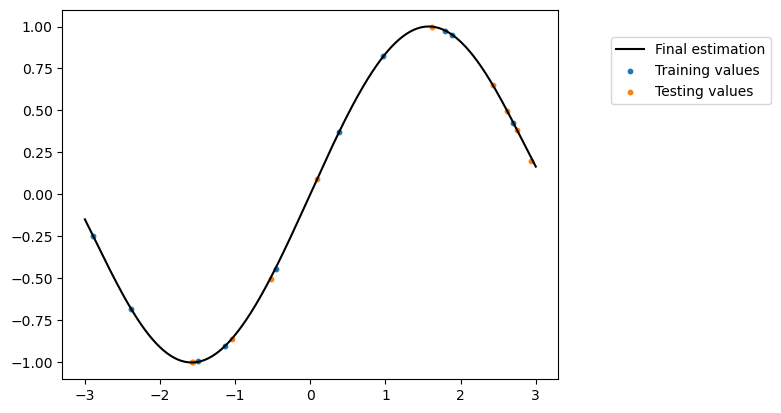

[0.001417147773607579, 0.9899312969939109, -0.0020334513189557294, -0.1570635651088889, 0.00029530972251152034, 0.005877948409778497]


PyObject <matplotlib.legend.Legend object at 0x7f14c32038b0>

In [34]:
# d = pocet clenu v polynomu ... stupen + 1, w_init = pocatecni odhad do gradientniho sestupu

d = 6
w_init = rand(-0.001:0.001, d)
y_init = P(w_init, x_train, d)


####################################################################################

# grad_descend( data_x, data_y, init. odhad, stupen+1, krok, residdum, max. iteraci, vypis po kazdne xx iteraci)
w_final = grad_descend(x_train, y_train, w_init, d, 5.0e-6, 0.0025, 1.0e8, 5.0e5)
println("w final = ", w_final)

plot_results(x_train, y_train, x_test, y_test, w_init, w_final, "Degree "*string(d-1)*", without regularisation")




iter = 5000000
  w = [0.02635158778326478, 0.9647013464088839, -0.04575854063427144, -0.14347977301851353, 0.014241113611320043, 0.004454450514467861, -0.0011417917830076779]
  loss = 0.042746430545757344
g norm = 0.026194548228348748

iter = 10000000
  w = [0.0030118990919949973, 0.9907947552131845, -0.0028627239820313926, -0.15746749901746962, 0.0002914385715920793, 0.00591927658502511, 1.2139790988944291e-5]
  loss = 0.007444976635159213
g norm = 0.0039832066114721615



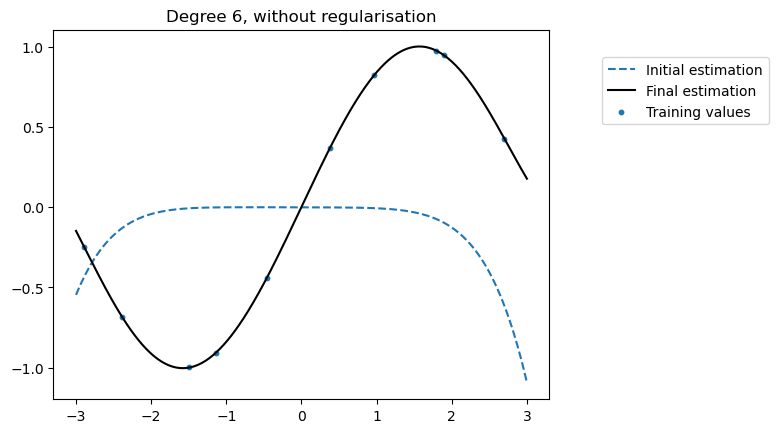

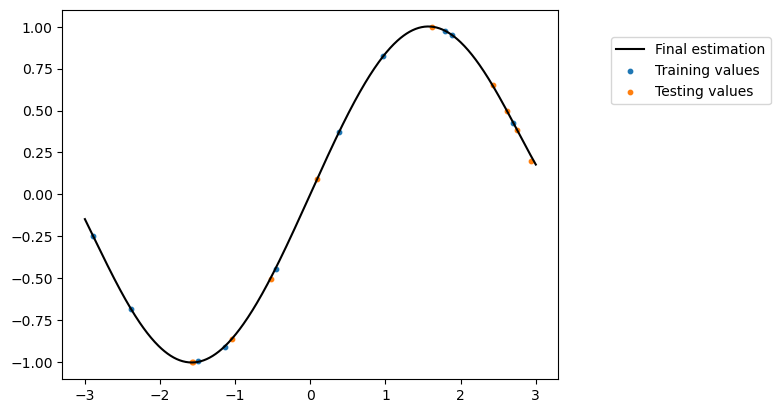

w final = [0.001389624823079071, 0.9924353627636057, 6.29539263192152e-5, -0.1583585292448056, -0.0006534129272581029, 0.006013211945093938, 8.998286262508206e-5]


PyObject <matplotlib.legend.Legend object at 0x7f14aa5a2fd0>

In [43]:
# d = pocet clenu v polynomu ... stupen + 1, w_init = pocatecni odhad do gradientniho sestupu

d = 7
w_init = rand(-0.001:0.001, d)
y_init = P(w_init, x_train, d)


####################################################################################

w_final = grad_descend(x_train, y_train, w_init, d, 1.0e-6, 0.0025, 1.0e8, 5.0e6)
println("w final = ", w_final)

plot_results(x_train, y_train, x_test, y_test, w_init, w_final, "Degree "*string(d-1)*", without regularisation")

